In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.options.display.float_format = '{:,.0f}'.format
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [2]:
df.shape

(5110, 12)

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202,nan,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80,1,0,Yes,Private,Urban,84,nan,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0
5109,44679,Female,44,0,0,Yes,Govt_job,Urban,85,26,Unknown,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
clean_df = df.drop(columns=['id'])
clean_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202,nan,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,84,nan,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0


In [7]:
#minimal data cleaning

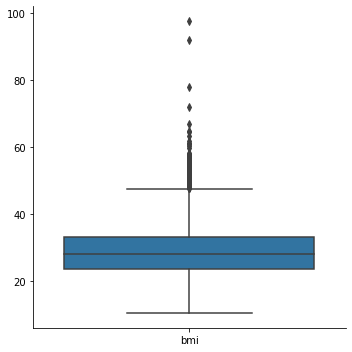

In [8]:
sns.catplot(data = clean_df[['bmi']], kind='box')

In [9]:
#better to replace missing values with median to now skew bmi data

In [10]:
bmi_median =clean_df[['bmi']].median()
bmi_median

bmi   28
dtype: float64

In [11]:
clean_df['bmi'].fillna(28, inplace=True)
clean_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202,28,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,84,28,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0


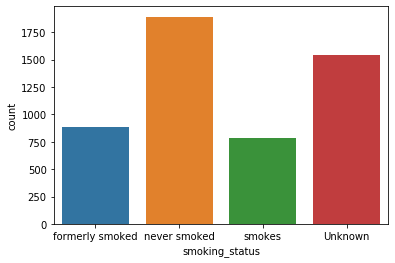

In [12]:
sns.countplot(x=clean_df['smoking_status'])

In [13]:
clean_df['smoking_status'].replace(['Unknown'], clean_df['smoking_status'].mode(), inplace=True)

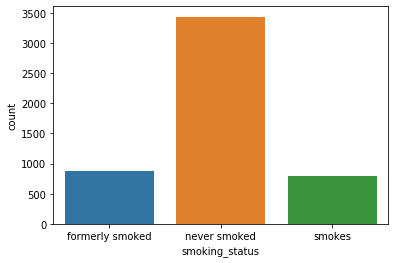

In [14]:
sns.countplot(x=clean_df['smoking_status'])

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [16]:
#Exploratory Data Analysis: Categorical
#Features: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status

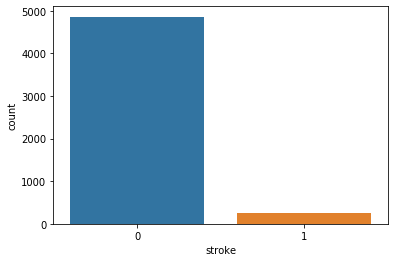

In [17]:
sns.countplot(x = 'stroke', data = clean_df)

In [18]:
clean_df[clean_df['stroke']==1].count()

gender               249
age                  249
hypertension         249
heart_disease        249
ever_married         249
work_type            249
Residence_type       249
avg_glucose_level    249
bmi                  249
smoking_status       249
stroke               249
dtype: int64

In [19]:
#Our dataset is heavily skewed one way. This will be a problem when trying to create a model that makes great predictions

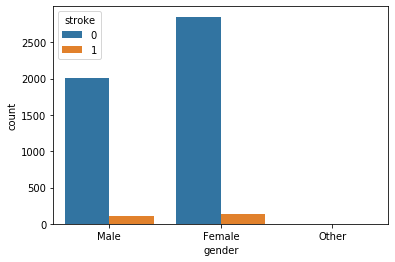

In [20]:
sns.countplot(x = 'gender', hue='stroke', data=clean_df)

In [21]:
clean_df[clean_df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26,0,0,No,Private,Rural,143,22,formerly smoked,0


In [22]:
#this will be dropped later because this single example based on the "Other" gender will skew the model too heavily: 
#The models will automatically think that any person with the "Other" gender won't likely have a stroke, which isn't always the case
#will be dropped once the OneHotEncoding is complete to not skew data results

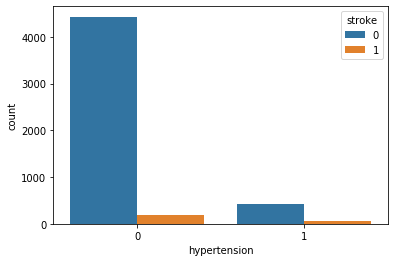

In [23]:
sns.countplot(x = 'hypertension', hue='stroke', data=clean_df)

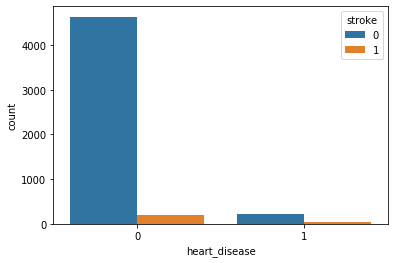

In [24]:
sns.countplot(x = 'heart_disease', hue='stroke', data=clean_df)

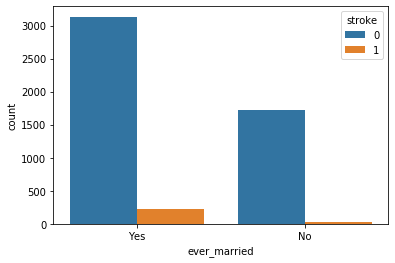

In [25]:
sns.countplot(x = 'ever_married', hue='stroke', data=clean_df)

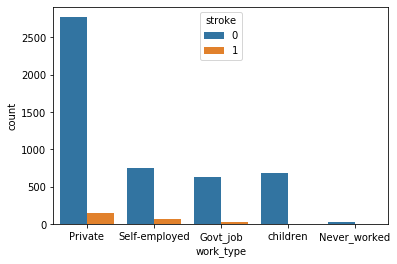

In [26]:
sns.countplot(x = 'work_type', hue='stroke', data=clean_df)

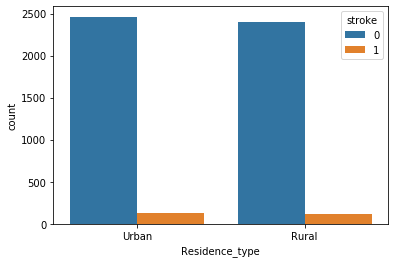

In [27]:
sns.countplot(x = 'Residence_type', hue='stroke', data=clean_df)

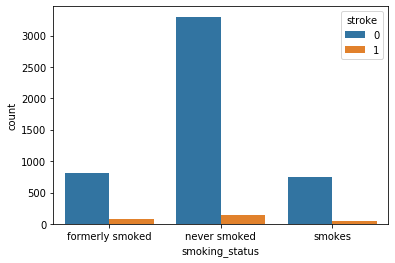

In [28]:
sns.countplot(x = 'smoking_status', hue='stroke', data=clean_df)

In [29]:
#numerical features: age, avg_glucose_level, bmi

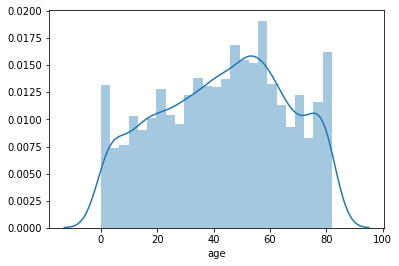

In [30]:
sns.distplot(clean_df['age'], bins=25)

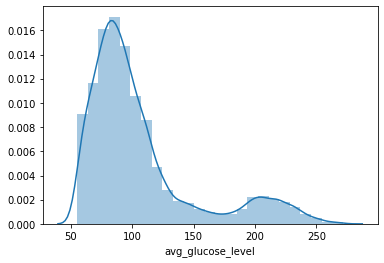

In [31]:
sns.distplot(clean_df['avg_glucose_level'], bins=25)

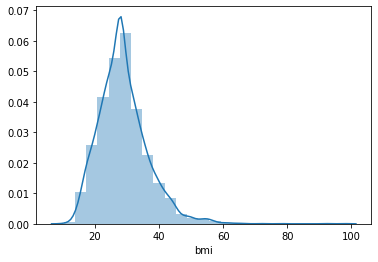

In [32]:
sns.distplot(clean_df['bmi'], bins=25)

In [33]:
#density pairplot to see numeric factors' correlations to strokes

C:\Users\mrpow\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mrpow\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


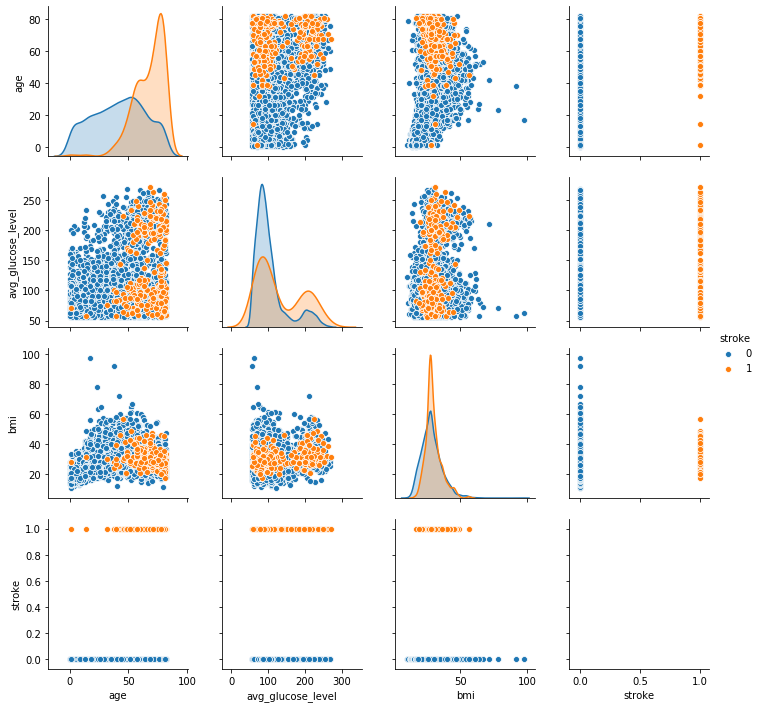

In [34]:
numeric = clean_df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
sns.pairplot(numeric, hue='stroke')

In [35]:
#making sure that there's no correlation between age and marriage status, if thre is, it will be dropped

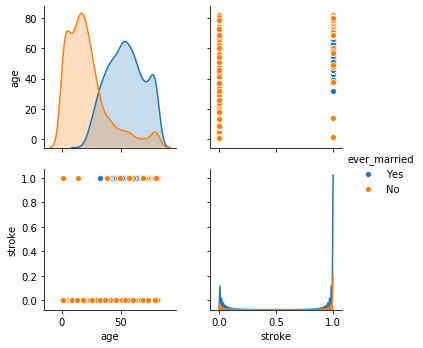

In [36]:
age = clean_df[['age', 'stroke','ever_married']]
sns.pairplot(age, hue='ever_married')

In [37]:
numeric.describe()

,age,avg_glucose_level,bmi,stroke
count,"5,110","5,110","5,110","5,110"
mean,43,106,29,0
std,23,45,8,0
min,0,55,10,0
25%,25,77,24,0
50%,45,92,28,0
75%,61,114,33,0
max,82,272,98,1


In [38]:
#preprocessing

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
preprocessing = clean_df
preprocessing

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202,28,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,84,28,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0


In [41]:
#one hot encode two columns: work_type and smoking_status since they contain more than two categories

In [42]:
ohe = OneHotEncoder()
ohe_results = ohe.fit_transform(preprocessing[['work_type']])
pd.DataFrame(ohe_results.toarray(), columns=ohe.categories_)
processed_data1 = preprocessing.join(pd.DataFrame(ohe_results.toarray(), columns=ohe.categories_))
processed_data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,"(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)"
0,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1,0,0,1,0,0
1,Female,61,0,0,Yes,Self-employed,Rural,202,28,never smoked,1,0,0,0,1,0
2,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1,0,0,1,0,0
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1,0,0,1,0,0
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,84,28,never smoked,0,0,0,1,0,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0,0,0,0,1,0
5107,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0,0,0,0,1,0
5108,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0,0,0,1,0,0


In [43]:
ohe2 = OneHotEncoder()
ohe_results2 = ohe2.fit_transform(processed_data1[['smoking_status']])
processed_data2 = processed_data1.join(pd.DataFrame(ohe_results2.toarray(), columns=ohe2.categories_))

In [44]:
processed_data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,"(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(formerly smoked,)","(never smoked,)","(smokes,)"
0,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1,0,0,1,0,0,1,0,0
1,Female,61,0,0,Yes,Self-employed,Rural,202,28,never smoked,1,0,0,0,1,0,0,1,0
2,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1,0,0,1,0,0,0,1,0
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1,0,0,1,0,0,0,0,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,84,28,never smoked,0,0,0,1,0,0,0,1,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0,0,0,0,1,0,0,1,0
5107,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0,0,0,0,1,0,0,1,0
5108,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0,0,0,1,0,0,1,0,0


In [45]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [46]:
#Ordinal encoding will be used for columns with two categories
#Since our One Hot Encoding was done, we can drop the "Other" gender row

In [47]:
final_encoding = processed_data2
final_encoding = final_encoding.drop(df.index[3116], axis=0)
final_encoding

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,"(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(formerly smoked,)","(never smoked,)","(smokes,)"
0,Male,67,0,1,Yes,Private,Urban,229,37,formerly smoked,1,0,0,1,0,0,1,0,0
1,Female,61,0,0,Yes,Self-employed,Rural,202,28,never smoked,1,0,0,0,1,0,0,1,0
2,Male,80,0,1,Yes,Private,Rural,106,32,never smoked,1,0,0,1,0,0,0,1,0
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1,0,0,1,0,0,0,0,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,84,28,never smoked,0,0,0,1,0,0,0,1,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,0,0,0,0,1,0,0,1,0
5107,Female,35,0,0,Yes,Self-employed,Rural,83,31,never smoked,0,0,0,0,1,0,0,1,0
5108,Male,51,0,0,Yes,Private,Rural,166,26,formerly smoked,0,0,0,1,0,0,1,0,0


In [48]:
final_encoding['gender'] = oe.fit_transform(final_encoding[['gender']])
final_encoding['ever_married'] = oe.fit_transform(final_encoding[['ever_married']])
final_encoding['Residence_type'] = oe.fit_transform(final_encoding[['Residence_type']])

In [49]:
final_encoding

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,"(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(formerly smoked,)","(never smoked,)","(smokes,)"
0,1,67,0,1,1,Private,1,229,37,formerly smoked,1,0,0,1,0,0,1,0,0
1,0,61,0,0,1,Self-employed,0,202,28,never smoked,1,0,0,0,1,0,0,1,0
2,1,80,0,1,1,Private,0,106,32,never smoked,1,0,0,1,0,0,0,1,0
3,0,49,0,0,1,Private,1,171,34,smokes,1,0,0,1,0,0,0,0,1
4,0,79,1,0,1,Self-employed,0,174,24,never smoked,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,Private,1,84,28,never smoked,0,0,0,1,0,0,0,1,0
5106,0,81,0,0,1,Self-employed,1,125,40,never smoked,0,0,0,0,1,0,0,1,0
5107,0,35,0,0,1,Self-employed,0,83,31,never smoked,0,0,0,0,1,0,0,1,0
5108,1,51,0,0,1,Private,0,166,26,formerly smoked,0,0,0,1,0,0,1,0,0


In [50]:
final_encoding = final_encoding.drop(['work_type', 'smoking_status'], axis=1)

In [51]:
final_encoding

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,"(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(formerly smoked,)","(never smoked,)","(smokes,)"
0,1,67,0,1,1,1,229,37,1,0,0,1,0,0,1,0,0
1,0,61,0,0,1,0,202,28,1,0,0,0,1,0,0,1,0
2,1,80,0,1,1,0,106,32,1,0,0,1,0,0,0,1,0
3,0,49,0,0,1,1,171,34,1,0,0,1,0,0,0,0,1
4,0,79,1,0,1,0,174,24,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,1,84,28,0,0,0,1,0,0,0,1,0
5106,0,81,0,0,1,1,125,40,0,0,0,0,1,0,0,1,0
5107,0,35,0,0,1,0,83,31,0,0,0,0,1,0,0,1,0
5108,1,51,0,0,1,0,166,26,0,0,0,1,0,0,1,0,0


In [52]:
X = final_encoding.drop('stroke', axis = 1).values
y = final_encoding['stroke'].values.reshape(-1,1)

In [53]:
X

array([[ 1., 67.,  0., ...,  1.,  0.,  0.],
       [ 0., 61.,  0., ...,  0.,  1.,  0.],
       [ 1., 80.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0., 35.,  0., ...,  0.,  1.,  0.],
       [ 1., 51.,  0., ...,  1.,  0.,  0.],
       [ 0., 44.,  0., ...,  0.,  1.,  0.]])

In [54]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [55]:
#logistic regression

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

In [57]:
#smote is a package from the imblearn which is a package that balances out the dataset by oversampling the imbalanced class

In [58]:
smote = SMOTE()

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [61]:
X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

In [62]:
#creating a pipeline that uses MinMaxScaler and the logistic regression model

In [63]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

C:\Users\mrpow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [64]:
y_pred_lr = pipe.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[1077  367]
 [  24   65]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.74      1533
   macro avg       0.56      0.74      0.55      1533
weighted avg       0.93      0.74      0.81      1533



In [66]:
y_score1 = pipe.predict_proba (X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_score1)

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

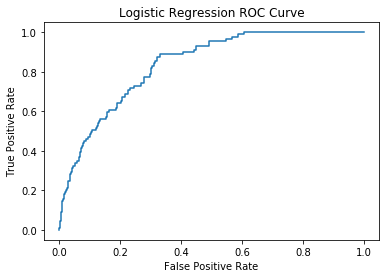

In [67]:
plt.plot(fpr, tpr, label = "LR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score1)

0.8357169535310778

In [69]:
#all things considered, the logistic regression performs okay. We will see if we can use PCA to better improve the model

In [70]:
#logistic regression using PCA

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [73]:
X_scaled.shape

(5109, 16)

In [74]:
from sklearn.decomposition import PCA
pca_model = PCA()
X_PCA = pca_model.fit_transform(X_scaled)

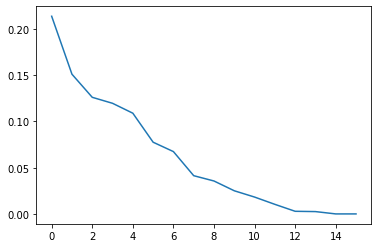

In [75]:
var_ratio = pca_model.explained_variance_ratio_
plt.plot(var_ratio)

In [76]:
#a good number to go with would be a number where a majority of our feature data stays intact, while still grabbing the most important principle components
#We can set n_components to be 0.9, which takes the parameters that explain 90% of the variance of the our feature data

In [77]:
pca_new = PCA(n_components = 0.9)
X_trimmed = pca_new.fit_transform(X_scaled)

In [78]:
X_trimmed.shape

(5109, 8)

In [79]:
#turns out it's 8 components that explain 90% of the variance in our features

In [80]:
X_trimmed_train, X_trimmed_test, y_trimmed_train, y_trimmed_test = train_test_split(X_trimmed,y,test_size=0.3,random_state = 42)

In [81]:
smote2 = SMOTE()
X_trimmed_train, y_trimmed_train = smote2.fit_resample(X_trimmed_train, y_trimmed_train.ravel())

In [82]:
X_trimmed_train.shape

(6832, 8)

In [83]:
reg_new = LogisticRegression()
reg_new.fit(X_trimmed_train, y_trimmed_train)
y_pred_lr_new = reg_new.predict(X_trimmed_test)

C:\Users\mrpow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
print(confusion_matrix(y_trimmed_test, y_pred_lr_new))

[[901 543]
 [ 18  71]]


In [85]:
print(classification_report(y_trimmed_test, y_pred_lr_new))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76      1444
           1       0.12      0.80      0.20        89

    accuracy                           0.63      1533
   macro avg       0.55      0.71      0.48      1533
weighted avg       0.93      0.63      0.73      1533



In [86]:
y_score2 = reg_new.predict_proba (X_trimmed_test)[:,1]
fpr, tpr, threshold = roc_curve(y_trimmed_test,y_score2)

Text(0.5, 1.0, 'Logistic Regression PCA ROC Curve')

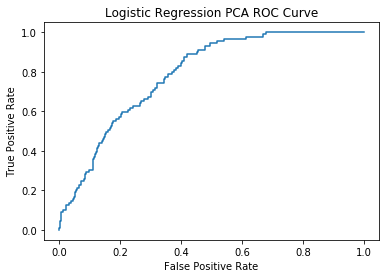

In [87]:
plt.plot(fpr, tpr, label = "LR_PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression PCA ROC Curve")

In [88]:
roc_auc_score(y_test, y_score2)

0.7875673067944847

In [89]:
#In this case, our F1 score, negative recall, and AUC goes down, but our positive recall goes way up!

In [90]:
#KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True)

In [92]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
smote3 = SMOTE()
X_knn_train, y_knn_train = smote3.fit_resample(X_knn_train, y_knn_train.ravel())

In [93]:
#before making a model right away, we're going to use cross validation to find the best number of neighbors for KNN to use

In [94]:
neighbors = np.arange(1, 30, 1)
cross_val_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_knn_train, y_knn_train.ravel(), cv = skfold)
    cross_val_scores.append(np.mean(scores))
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))

best cross-validation score: 0.941


In [95]:
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

best n_neighbors: 1


In [96]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_knn_train, y_knn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [97]:
y_knn_predict = knn.predict(X_knn_test)
print(confusion_matrix(y_knn_test, y_knn_predict))

[[1314  130]
 [  71   18]]


In [98]:
print(classification_report(y_knn_test, y_knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1444
           1       0.12      0.20      0.15        89

    accuracy                           0.87      1533
   macro avg       0.54      0.56      0.54      1533
weighted avg       0.90      0.87      0.88      1533



In [99]:
y_score3 = knn.predict_proba (X_knn_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_score3)

plt.plot(fpr, tpr, label = "KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")

In [100]:
roc_auc_score(y_test, y_score3)

0.5561097450901056

In [101]:
#worst performing model by far. Doesn't matter that the negative classes perform well. Positive classes need to perform well

In [102]:
#best overall model: Logistic Regression
#best model at calculating positive recall and negative precision (arguably more important): Logistic Regression using PCA